### 1. Import Libraries and Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, accuracy_score)
df = pd.read_csv("data/titanic_clean.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone,Title,Fare_per_person,AgeBin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,Mr,3.62500,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0,Mrs,35.64165,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,Miss,7.92500,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0,Mrs,26.55000,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,Mr,8.05000,Adult


In [3]:
# checking shape of data
df.shape

(891, 16)

In [4]:
# info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Embarked         891 non-null    object 
 11  FamilySize       891 non-null    int64  
 12  IsAlone          891 non-null    int64  
 13  Title            891 non-null    object 
 14  Fare_per_person  891 non-null    float64
 15  AgeBin           891 non-null    object 
dtypes: float64(3), int64(7), object(6)
memory usage: 111.5+ KB


### 2. Feature Selection and Preprocessing

In [5]:
# Select relevant features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone']
df['Sex'] = df['Sex'].map({'male': 1, 'female':0})
target = 'Survived'
X = df[features]
y = df[target]

In [6]:
# Scale numerical features
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X[['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])

# Splitting data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 3, test_size = 0.2)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (712, 6) Test shape: (179, 6)


### 3. Train Model

In [7]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

### 4. Evaluate Model

In [8]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.765
ROC-AUC: 0.759

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       109
           1       0.69      0.73      0.71        70

    accuracy                           0.77       179
   macro avg       0.75      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



### 5. Visualizing Confusion Matrix & ROC Curve

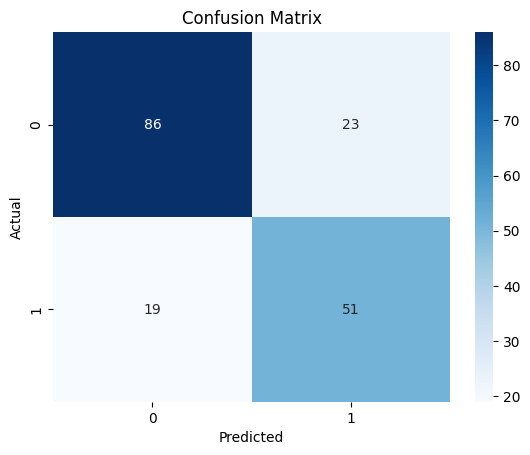

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

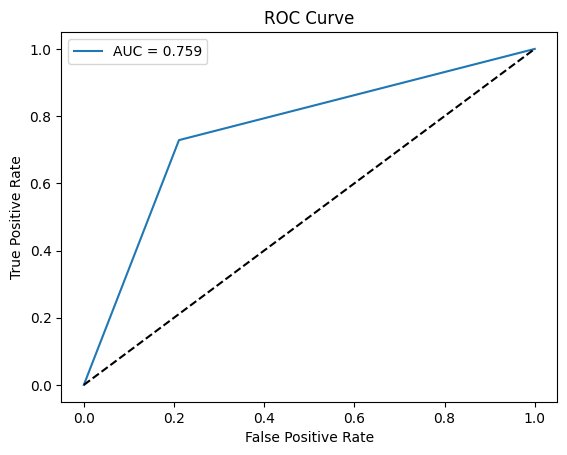

In [10]:
# ROC Curve
fpr, tpr,_ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label = f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 6. Model Coefficients Interpretation

In [11]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

coef_df

,Feature,Coefficient
3,Fare,0.388097
4,FamilySize,-0.475333
2,Age,-0.588378
5,IsAlone,-0.632166
0,Pclass,-1.064552
1,Sex,-2.601973


### 🔍 Model Insights

| Feature | Interpretation |
|----------|----------------|
| **Sex (female)** | Strong negative coefficient — females more likely to survive |
| **Pclass** | Negative coefficient — higher class number (lower status) reduces survival |
| **Fare** | Positive — higher fare → higher survival odds |
| **IsAlone** | Negative — solo travelers less likely to survive |
| **FamilySize** | Negatiive — higher family size, lower survival chances |


### 7. Save Results

In [12]:
# Save model and evaluation summary
model_summary = {
    'accuracy': acc,
    'roc_auc': roc_auc,
    'n_features': len(X.columns),
    'train_rows': len(X_train),
    'test_rows': len(X_test)
}

pd.DataFrame([model_summary]).to_csv("data/titanic_model_summary.csv", index=False)
print("✅ Model summary saved to titanic_model_summary.csv")


✅ Model summary saved to titanic_model_summary.csv


### 📘 How Logistic Regression Works

Logistic Regression is a **classification algorithm** that predicts the probability of an instance belonging to a class (e.g., Survived = 1 or 0).

- It uses a **sigmoid (logistic) function** to map any value between 0 and 1.
- Decision boundary is usually **0.5** (≥ 0.5 = Survived, < 0.5 = Not Survived).

Mathematically:
$$
P(y=1|x) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n)}}
$$

Key Insights:
- Coefficients show **direction & strength** of impact.
- Useful for **interpretable binary classification**.
- Sensitive to **multicollinearity** and **feature scaling**.


In [14]:
coef_df

,Feature,Coefficient
3,Fare,0.388097
4,FamilySize,-0.475333
2,Age,-0.588378
5,IsAlone,-0.632166
0,Pclass,-1.064552
1,Sex,-2.601973


### 🧠 Model Interpretation Challenge

**Question 1:** Which variable has the largest positive effect on survival probability?  
**Answer:** From the selected variables the variable Fare has the largest positive effect on survival probability.
**Question 2:** Why should we scale numeric features before logistic regression?  
**Answer:** Logistic regression uses optimization algorithms that are sensitive to feature scale; large feature ranges can slow convergence. Features with larger numeric ranges can dominate the cost function, leading to misleadingly large coefficients. Scaling avoids very large or very small values that can cause computational issues when calculating the sigmoid function.
**Question 3:** What happens if we include highly correlated features (e.g., FamilySize & IsAlone)?  
**Answer:** ncluding highly correlated features (like FamilySize and IsAlone) causes multicollinearity, which can lead to:

1. Unstable coefficients — the model struggles to assign correct weights since both features carry overlapping information.

2. Reduced interpretability — coefficient magnitudes and signs may become unreliable.

3. Possible overfitting — redundant features can make the model too sensitive to noise.

Although overall predictive performance may not drop drastically, it’s better to remove or combine correlated variables to improve model stability and clarity.
**Question 4:** What’s the difference between Accuracy and AUC?  
**Answer:** Accuracy measures the overall proportion of correct predictions (both positives and negatives). It depends on a chosen classification threshold (e.g., 0.5). AUC (Area Under the ROC Curve) measures the model’s ability to rank positives higher than negatives, regardless of threshold.
**Question 5:** Why is Logistic Regression called “Regression” if it’s used for classification?
**Answer:** It’s called “Regression” because logistic regression predicts a continuous probability value (between 0 and 1) using a regression equation — a linear combination of input features passed through a logistic (sigmoid) function.


### Model Improvement and Experimentation

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'DecisionTree': DecisionTreeClassifier(random_state = 42),
    'RandomForest': RandomForestClassifier(random_state = 42)

}


results = {}
for name, m in models.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, m.predict_proba(X_test)[:,1])
    results[name] = [acc, roc_auc]
pd.DataFrame(results, index = ['Accuracy', 'ROC_AUC']).T

,Accuracy,ROC_AUC
LogisticRegression,0.765363,0.818414
DecisionTree,0.770950,0.762779
RandomForest,0.798883,0.841874


### Cross Validation

In [18]:
from sklearn.model_selection import cross_val_score
roc_auc = {}

for name, m in models.items():
    cv_scores = cross_val_score(m, X, y, cv=5, scoring='roc_auc')
    roc_auc[name] = cv_scores.mean().round(3)
pd.DataFrame(roc_auc, index = ['ROC_AUC'])

,LogisticRegression,DecisionTree,RandomForest
ROC_AUC,0.851,0.758,0.869
